<a href="https://colab.research.google.com/github/seonkyena/handson_ml/blob/main/housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 공통 모듈 임포트
import numpy as np
import os

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [ ]:
import os
import tarfile
import urllib.request

In [ ]:
download_root = 'https://raw.githubusercontent.com/ageron/handson-ml2/master/'
housing_path = os.path.join('datasets', 'housing')
housing_url = download_root + 'datasets/housing/housing.tgz'

In [ ]:
def fetch_housing_data(housing_url=housing_url, housing_path=housing_path):
  os.makedirs(housing_path, exist_ok=True)
  tgz_path = os.path.join(housing_path, 'housing.tgz')
  urllib.request.urlretrieve(housing_url, tgz_path)
  housing_tgz = tarfile.open(tgz_path)
  housing_tgz.extractall(path=housing_path)
  housing_tgz.close()

In [ ]:
fetch_housing_data()

In [ ]:
import pandas as pd

In [ ]:
def load_housing_data(housing_path=housing_path):
  csv_path = os.path.join(housing_path, 'housing.csv')
  return pd.read_csv(csv_path)

In [ ]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
housing.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


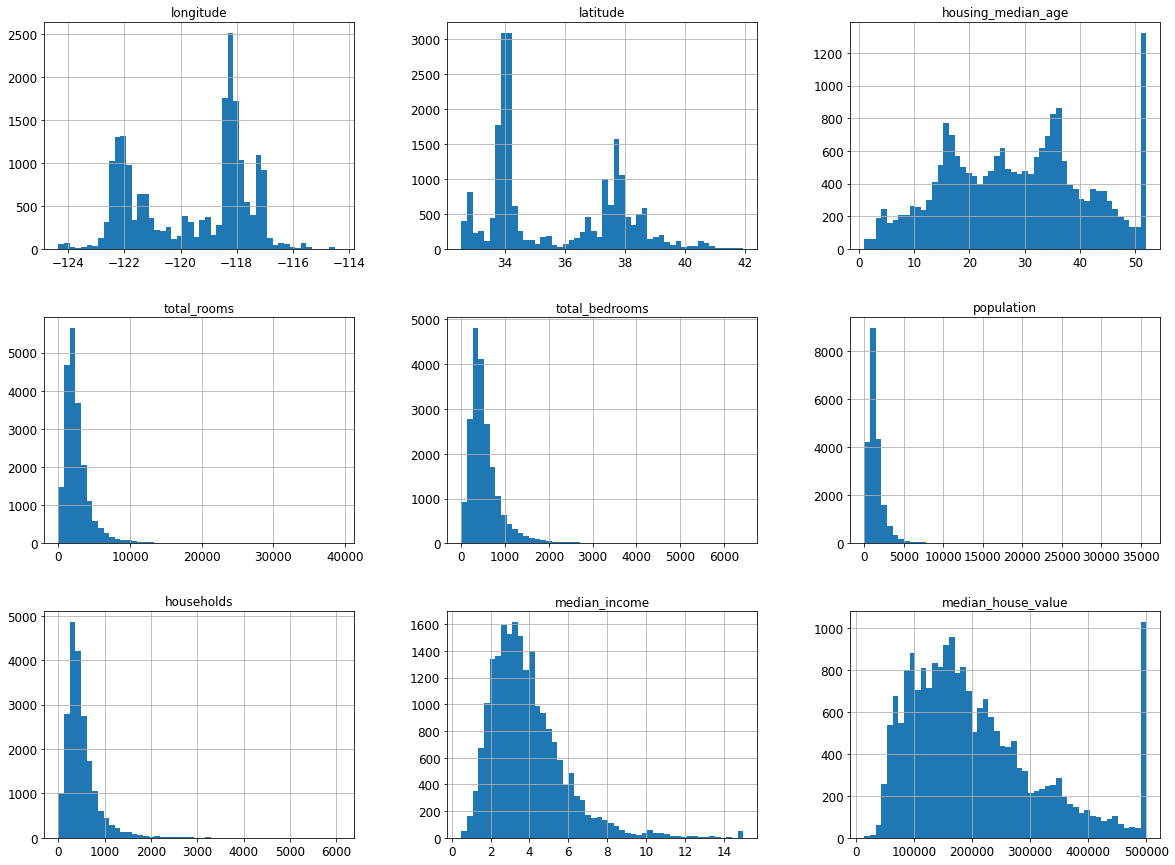

In [ ]:
housing.hist(bins=50, figsize=(20, 15))
plt.show()

In [ ]:
# 데이터의 용량이 충분히 큰 경우
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

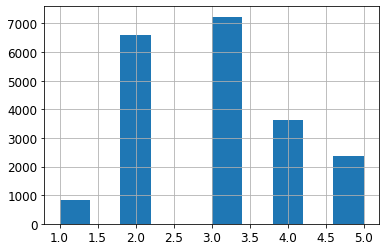

In [ ]:
# 데이터셋이 충분하지 않은 경우
# 편향이 생기지 않게 하기 위해 중요한 레이블에 한해 카테고리 분류
housing['income_cat'] = pd.cut(housing['median_income'],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])
housing['income_cat'].hist()

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['income_cat']):
  strat_train_set = housing.loc[train_index]
  strat_test_set = housing.loc[test_index]

In [ ]:
strat_test_set['income_cat'].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [ ]:
# income_cat 삭제
for set_ in (strat_train_set, strat_test_set):
  set_.drop('income_cat', axis=1, inplace=True)

In [ ]:
housing_train = strat_train_set.copy()

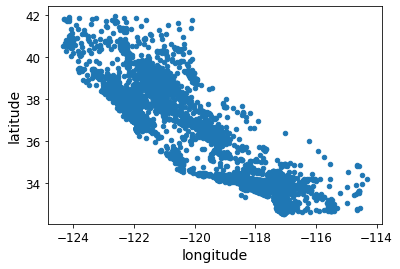

In [ ]:
housing_train.plot(kind='scatter', x='longitude', y='latitude')

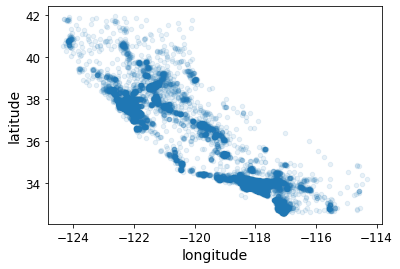

In [ ]:
housing_train.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

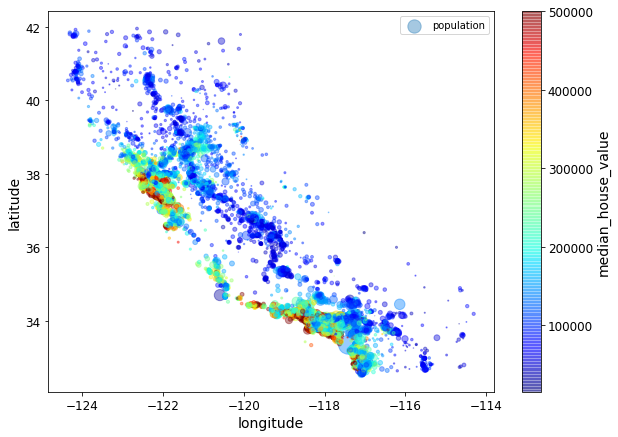

In [ ]:
housing_train.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
                   s=housing_train['population']/100, label='population', figsize=(10,7),
                   c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True,
                   sharex=False)
plt.legend()

In [ ]:
# 표준 상관계수 확인 
# 1에 가까울 수록 양의 상관, -1에 가까울 수록 음의 상관, 0에 가까우면 아무 상관 없음
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdfef3f5250>,
      dtype=object)

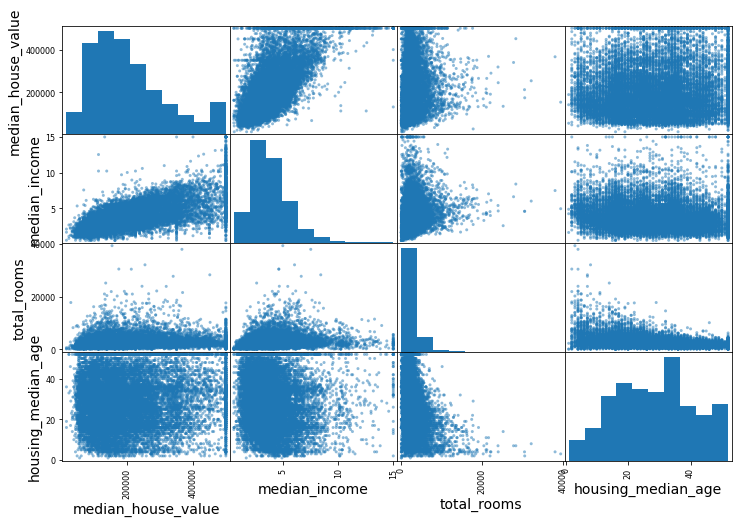

In [ ]:
# 산점도로 특성 파악하기
from pandas.plotting import scatter_matrix

attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing_train[attributes], figsize=(12, 8))

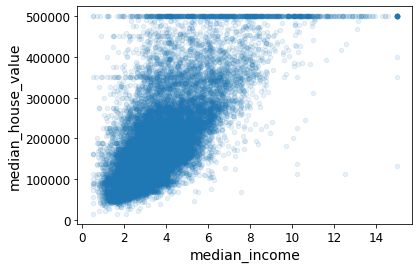

In [ ]:
# 중간 소득 대비 중간 주택 가격만 확대
housing_train.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1)

In [ ]:
housing_train['rooms_per_household'] = housing_train['total_rooms']/housing_train['households']
housing_train['bedrooms_per_room'] = housing_train['total_bedrooms']/housing_train['total_rooms']
housing_train['population_per_household'] = housing_train['population']/housing_train['households']

corr_matrix = housing_train.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

In [ ]:
housing_train = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

In [ ]:
# 데이터 정제
# 누락값 처리

# 해당 구역 제거
# housing_train.dropna(subset=['total_bedrooms'])

# 전체 특성 삭제
# housing_train.drop('total_bedrooms', axis=1)

# 특정 값으로 채움
# median = housing_train['total_bedrooms'].median()
# housing_train['total_bedrooms'].fillna(median, inplace=True)

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

In [ ]:
housing_num = housing_train.drop('ocean_proximity', axis=1)
imputer.fit(housing_num)
print(imputer.statistics_) # 모든 특성의 중간값을 저장
print(housing_num.median().values)

[-118.51      34.26      29.      2119.       433.      1164.
  408.         3.54155]
[-118.51      34.26      29.      2119.       433.      1164.
  408.         3.54155]


In [ ]:
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964


In [ ]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


In [ ]:
# 텍스트와 범주형 특성
from sklearn.preprocessing import OrdinalEncoder

housing_cat = housing_train[['ocean_proximity']]

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [ ]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [ ]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [ ]:
# 조합 특성을 추가하는 변환기
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
  def __init__(self, add_bedrooms_per_room = True): # *args나 **kwargs 가 아님
    self.add_bedrooms_per_room = add_bedrooms_per_room
  def fit(self, X, y=None):
    return self # 더 할 일이 없음
  def transform(self, X):
    rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
    population_per_household = X[:, population_ix] / X[:, households_ix]
    if self.add_bedrooms_per_room:
      bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
      return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
    else:
      return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing_train.values)

In [ ]:
# 변환 파이프라인
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
                         ('imputer', SimpleImputer(strategy='median')),
                         ('attribs_adder', CombinedAttributesAdder()),
                         ('std_scaler', StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [ ]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

full_pipeline = ColumnTransformer([
                                   ('num', num_pipeline, num_attribs),
                                   ('cat', OneHotEncoder(), cat_attribs),
])

housing_prepared = full_pipeline.fit_transform(housing_train)

In [ ]:
# 모델 선택과 훈련
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [ ]:
s_d = housing_train.iloc[:5]
s_l = housing_labels.iloc[:5]
s_d_p = full_pipeline.transform(s_d)
print('예측 :', lin_reg.predict(s_d_p))
print('레이블 :', list(s_l))

예측 : [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]
레이블 : [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [ ]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68627.87390018745

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [ ]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring='neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-scores) # mse의 반댓값을 계산하기 위해 -scores

In [ ]:
def display_scores(scores):
  print('점수 :', scores)
  print('평균 :', scores.mean())
  print('표준편차 :', scores.std())

display_scores(tree_rmse_scores)

점수 : [71885.90173294 70964.9591312  69714.78311769 71264.49331747
 70924.04508579 79161.26599453 69874.65054148 73406.41289883
 67616.19421295 69751.25194363]
평균 : 71456.39579765176
표준편차 : 2951.3318551123425


In [ ]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring='neg_mean_squared_error', cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

점수 : [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
평균 : 69104.07998247063
표준편차 : 2880.3282098180644


In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18748.329981225117

In [ ]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                             scoring='neg_mean_squared_error', cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

점수 : [51625.0178959  49421.09637627 47046.4035024  51856.40117439
 47584.74033435 51879.92414242 52541.87225603 50209.30378614
 48962.60844992 53692.31148739]
평균 : 50481.967940520764
표준편차 : 2083.379495538239


In [ ]:
# 모델 세부 튜닝
from sklearn.model_selection import GridSearchCV

param_grid = [
              {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
              {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
]
forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
  print(np.sqrt(-mean_score), params)

63717.70463105804 {'max_features': 2, 'n_estimators': 3}
55548.86491115201 {'max_features': 2, 'n_estimators': 10}
53052.215347787205 {'max_features': 2, 'n_estimators': 30}
59767.114716294 {'max_features': 4, 'n_estimators': 3}
52973.25664462257 {'max_features': 4, 'n_estimators': 10}
50352.815621432856 {'max_features': 4, 'n_estimators': 30}
59308.562783170724 {'max_features': 6, 'n_estimators': 3}
51802.64930121602 {'max_features': 6, 'n_estimators': 10}
49789.212967114654 {'max_features': 6, 'n_estimators': 30}
58942.19637964917 {'max_features': 8, 'n_estimators': 3}
52152.00906286037 {'max_features': 8, 'n_estimators': 10}
50002.347579061265 {'max_features': 8, 'n_estimators': 30}
63155.9002135511 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54122.96589969069 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59170.61346519955 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
53033.87072257721 {'bootstrap': False, 'max_features': 3, 'n_estimators': 

In [ ]:
# 중요도
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.95987689e-02, 6.86254764e-02, 4.06997160e-02, 1.77502148e-02,
       1.58941587e-02, 1.77717107e-02, 1.66692881e-02, 3.98929020e-01,
       4.39125872e-02, 1.02393607e-01, 4.95623959e-02, 7.85698637e-03,
       1.32679943e-01, 3.45344166e-05, 3.82138960e-03, 3.80020224e-03])

In [ ]:
extra_attribs = ['rooms_per_hhold', 'pop_per_hhold', 'bedrooms_per_room']
cat_encoder = full_pipeline.named_transformers_['cat']
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3989290200090658, 'median_income'),
 (0.13267994306225245, 'INLAND'),
 (0.10239360746900511, 'pop_per_hhold'),
 (0.07959876892306482, 'longitude'),
 (0.0686254763824056, 'latitude'),
 (0.04956239594473038, 'bedrooms_per_room'),
 (0.04391258722797231, 'rooms_per_hhold'),
 (0.04069971602223988, 'housing_median_age'),
 (0.017771710729804067, 'population'),
 (0.01775021479469809, 'total_rooms'),
 (0.016669288137149157, 'households'),
 (0.015894158674579464, 'total_bedrooms'),
 (0.007856986368644259, '<1H OCEAN'),
 (0.003821389602260133, 'NEAR BAY'),
 (0.0038002022354913173, 'NEAR OCEAN'),
 (3.4534416637203536e-05, 'ISLAND')]

In [ ]:
# 최종 평가
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop('median_house_value', axis=1)
y_test = strat_test_set['median_house_value'].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

47673.47451865993

In [ ]:
# 신뢰구간 계산
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors)-1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([45692.83337506, 49575.04738799])